# Project Transfer Learning with ResNet for a Fine-grain Classification Task 

## Introduction

* This project applies Transfer Learning to the classification task to study fine grain classfication problems. Fine grain classifcation refers to the detailed classification problem rather than identifying a general class type. 

## Data
* This project uses data publically available through Kaggle. The data involves 1300-1400 images of 10 different monkey species. Each image varies in the size. The original data can be found at the following source. 
    * Source: https://www.kaggle.com/slothkong/10-monkey-species

* The ten monkey species are listed below. 

| Species Name | Common Name |
                  | ------  | ------ |
  | Alouatta Palliata |         Mantled Howler |
| Erythrocebus Patas	|  Patas Monkey |
| Cacajao Calvus | Bald Uakari |
| Macaca Fuscata | Japanese Macaque |
| Cebuella Pygmea | Pygmy Marmoset |
| Cebus Capucinus | White Headed Capuchin |
| Mico Argentatus | Silvery Marmoset |
| Saimiri Sciureus | Common Squirrel Monkey |
| Aotus Nigriceps	| Black Headed Night Monkey |
| Trachypithecus Johnii | Nilgiri Langur |

* All of the classes have 131-152 images for training and 26-30 for Validation. More information on the dataset can be found at the Kaggle pace for the dataset.



## Design
* To experiment and identify the effect of nerual network architecture on learning and image classification, multiple models each with the same learning rate and a different transfered model architecture.
    * The different model architectures analyzed fall into two distinct classes: ResNet and VGG
    * ResNet models analyzed
        * Model R1: ResNet-18
        * Model R2: ResNet-34
        * Model R3: ResNet-50
        * Model R4: ResNet-101
        * Model R5: ResNet-152
    * VGG models analyzed
        * Model V1: VGG-13
        * Model V2: VGG-16
        * Model V3: VGG-19
        * Model V4: VGG-13 with Batch Normalization
        * Model V5: VGG-16  with Batch Normalization
        * Model V6: VGG-19  with Batch Normalization
    * This notebook contains the ResNet derived models
    
* Further information on the dataset and the approach taken in this project can be found in the report pdf located in the same repository. 

## Installing the required packages

In [0]:
#Import required packages
import torch 
import numpy as np
from torchvision import transforms, utils, datasets, models
import PIL.Image
import zipfile
import io
from google.colab import files
from torch import nn 
from torch import optim 
import torch.nn.functional as F
from matplotlib import pyplot as plt
from torch.utils.data.sampler import SubsetRandomSampler
import seaborn as sns
import pandas as pd

print("All libraries have been imported successfully")

train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print("Training on CPU")
else:
    print("Cuda is available. Training on GPU")

All libraries have been imported successfully
Cuda is available. Training on GPU


In [0]:

#Load image files through a zip file upload. 
#   Since the Kaggle dataset includes a prime number of images(1097), a random image index was removed
#   to allow for consistent batch sizes. There were 1096 total images with an individual batch size of 137.

uploaded = files.upload()


Saving train2.zip to train2.zip


In [0]:
#Unzip files
zf = zipfile.ZipFile(io.BytesIO(uploaded['train2.zip']), "r")
zf.extractall()

In [0]:
#Load the validation zip
# This collection is identical to the validation dataset provided from the Kaggle dataset page. 

validloaded = files.upload()

Saving valid.zip to valid.zip


In [0]:
#Unzip the validation zip

zf2 = zipfile.ZipFile(io.BytesIO(validloaded['valid.zip']), "r")
zf2.extractall()

## Building the Datasets

In [0]:
# Create the Test and Train Dataset
#     * This cell splits the uploaded training folder into a training and test dataset

#Using the subsetRandomSampler, isolate the test dataset as a random subset of the training data totalling 25% of the training data 
num_workers = 0
batch_size = 137
data_dir = 'train'
# 25% split of the training data= test data
test_size = 0.25
#Define the transformations for the training and test dataset. 
#  This transformation does not include any rotation or attribute skewing and therefore can also be applied to the test dataset
data_train_transforms = transforms.Compose([transforms.Resize((256,256)), transforms.ToTensor(), transforms.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5])])

#Import the training dataset
traintest_data = datasets.ImageFolder(data_dir, transform = data_train_transforms)

#Randomly identify the image indices for the training and test datasets
count_train = len(traintest_data)
train_indices = list(range(count_train))
np.random.shuffle(train_indices)
traintestsplit = int(np.floor(test_size * count_train))
traindata_idx, testdata_idx = train_indices[traintestsplit:], train_indices[:traintestsplit]

train_sampler = SubsetRandomSampler(traindata_idx)
test_sampler = SubsetRandomSampler(testdata_idx)

#Create the training and test dataloaders
train_dataloader = torch.utils.data.DataLoader(traintest_data, batch_size=batch_size, sampler = train_sampler, num_workers=num_workers)
test_dataloader = torch.utils.data.DataLoader(traintest_data, batch_size=batch_size, sampler = test_sampler, num_workers = num_workers)
print("Train and test dataloaders were created")


Train and test dataloaders were created


In [0]:
# Create the Validation dataset

#Define the transforms for the dataset
data_valid_transforms = transforms.Compose([transforms.Resize((256,256)), transforms.ToTensor(), transforms.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5])])

#Import the validation dataset
valid_dir = 'valid'
valid_data = datasets.ImageFolder(valid_dir, transform=data_valid_transforms)

#Create the validation dataloader
valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=32, shuffle=True)

print("The validation datasets were defined")

The validation datasets were defined


## Model R1: ResNet-18

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 46827520/46827520 [00:00<00:00, 153970322.42it/s]


Model R1's new classifier has been added
Epoch: 0 	Training Loss: 1.723604 	Validation Loss: 2.262041
Epoch: 1 	Training Loss: 1.677946 	Validation Loss: 2.208843
Epoch: 2 	Training Loss: 1.637338 	Validation Loss: 2.159001
Epoch: 3 	Training Loss: 1.597619 	Validation Loss: 2.109491
Epoch: 4 	Training Loss: 1.559213 	Validation Loss: 2.060545
Epoch: 5 	Training Loss: 1.518127 	Validation Loss: 2.009161
Epoch: 6 	Training Loss: 1.477063 	Validation Loss: 1.955660
Epoch: 7 	Training Loss: 1.433934 	Validation Loss: 1.900578
Epoch: 8 	Training Loss: 1.391384 	Validation Loss: 1.842103
Epoch: 9 	Training Loss: 1.343070 	Validation Loss: 1.782066
Epoch: 10 	Training Loss: 1.298381 	Validation Loss: 1.721171
Epoch: 11 	Training Loss: 1.248634 	Validation Loss: 1.658795
Epoch: 12 	Training Loss: 1.200468 	Validation Loss: 1.594617
Epoch: 13 	Training Loss: 1.146007 	Validation Loss: 1.528938
Epoch: 14 	Training Loss: 1.096000 	Validation Loss: 1.462793
Epoch: 15 	Training Loss: 1.048175 	Val

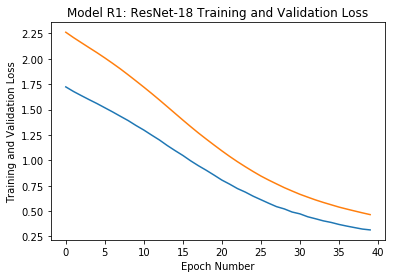

In [0]:
#Define the pretrained ResNet18 model
modelR1 = models.resnet18(pretrained=True)

for param in modelR1.parameters():
    param.requires_grad=False

#Define the classifier
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(512,102)
        #The output must be 10 to match the 10 monkey species classes
        self.fc2 = nn.Linear(102,10)
        
    def forward(self, x):
        x = x.view(x.shape[0],-1)
        x = F.relu(self.fc1(x))
        x = F.log_softmax(self.fc2(x), dim = 1)
        return x

#Instantiate the classifier and add it to the model
classifierR1 = Classifier()
modelR1.fc=classifierR1

print("Model R1's new classifier has been added")

#Define the criterion and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.NLLLoss()
optimizer = optim.SGD(modelR1.fc.parameters(), lr = 0.01)

#Move the model to the GPU. 
modelR1.to(device)

# Train the model with the pretrained weights
epochs = 40

trainLossListR1 = []
validLossListR1 = []

for epoch in range(epochs):
    
    train_loss = 0.0
    valid_loss = 0.0
    
    modelR1.train()
    for inputs, labels in train_dataloader:
        inputs, labels = inputs.to(device),labels.to(device)
        optimizer.zero_grad()
        logps = modelR1.forward(inputs)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()
        train_loss +=loss.item()*inputs.size(0)
    train_loss = train_loss/len(train_dataloader.dataset)
    
    modelR1.eval()
    for inputs, labels in valid_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        output = modelR1(inputs)
        loss = criterion(output, labels)
        valid_loss += loss.item()*inputs.size(0)
    valid_loss = valid_loss/len(valid_dataloader.dataset)
    
    trainLossListR1.append(train_loss)
    validLossListR1.append(valid_loss)
    
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(epoch,train_loss, valid_loss))
    
    
#Plot the train and validation losses
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(trainLossListR1)), trainLossListR1)
plt.plot(np.arange(len(validLossListR1)), validLossListR1)
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epoch Number')
plt.title('Model R1: ResNet-18 Training and Validation Loss')
plt.show()

In [0]:
#Test Model R1 on the test dataset

test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))


classes = ['monkey1', 'monkey2', 'monkey3', 'monkey4', 'monkey5', 'monkey6', 'monkey7',
          'monkey8', 'monkey9', 'monkey10']
modelR1.eval()
for tdata, ttarget in test_dataloader:
    tdata,ttarget = tdata.cuda(), ttarget.cuda()
    
    output = modelR1(tdata)
    loss = criterion(output, ttarget)
    test_loss += loss.item()*tdata.size(0)
    _, pred = torch.max(output,1)
    
    correct_tensor = pred.eq(ttarget.data.view_as(pred))  
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    
    for i in range(1,batch_size):
        label = ttarget.data[i-1]
        class_correct[label] += correct[i].item()
        class_total[label] += 1


test_loss = test_loss/len(test_dataloader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(0,10):
    if class_total[i]>0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d) ' %( classes[i], 100*class_correct[i]/class_total[i], np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (100. * np.sum(class_correct)/ np.sum(class_total), np.sum(class_correct), np.sum(class_total)))


    


Test Loss: 0.113025

Test Accuracy of monkey1: 96% (24/25) 
Test Accuracy of monkey2: 95% (22/23) 
Test Accuracy of monkey3: 96% (31/32) 
Test Accuracy of monkey4: 100% (24/24) 
Test Accuracy of monkey5: 100% (30/30) 
Test Accuracy of monkey6: 93% (27/29) 
Test Accuracy of monkey7: 93% (28/30) 
Test Accuracy of monkey8: 95% (23/24) 
Test Accuracy of monkey9: 96% (25/26) 
Test Accuracy of monkey10: 93% (27/29) 

Test Accuracy (Overall): 95% (261/272)


## Model R2: ResNet-34


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 59743904.56it/s]


The models new classifier has been added
Epoch: 0 	Training Loss: 1.728207 	Validation Loss: 2.262356
Epoch: 1 	Training Loss: 1.677109 	Validation Loss: 2.198863
Epoch: 2 	Training Loss: 1.629338 	Validation Loss: 2.135342
Epoch: 3 	Training Loss: 1.578068 	Validation Loss: 2.069325
Epoch: 4 	Training Loss: 1.525019 	Validation Loss: 2.000717
Epoch: 5 	Training Loss: 1.470472 	Validation Loss: 1.927974
Epoch: 6 	Training Loss: 1.412487 	Validation Loss: 1.853322
Epoch: 7 	Training Loss: 1.354004 	Validation Loss: 1.775584
Epoch: 8 	Training Loss: 1.292485 	Validation Loss: 1.695991
Epoch: 9 	Training Loss: 1.231304 	Validation Loss: 1.616546
Epoch: 10 	Training Loss: 1.165339 	Validation Loss: 1.535350
Epoch: 11 	Training Loss: 1.110777 	Validation Loss: 1.454087
Epoch: 12 	Training Loss: 1.047728 	Validation Loss: 1.373625
Epoch: 13 	Training Loss: 0.990027 	Validation Loss: 1.297451
Epoch: 14 	Training Loss: 0.929202 	Validation Loss: 1.220930
Epoch: 15 	Training Loss: 0.871063 	Val

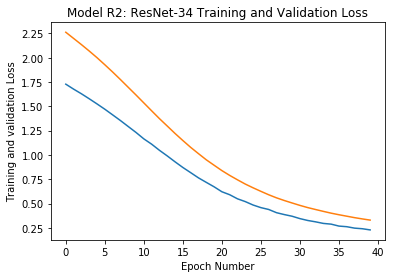

In [0]:
#Define the pretrained ResNet34 model
modelR2 = models.resnet34(pretrained=True)

for param in modelR2.parameters():
    param.requires_grad=False

#Define the classifier
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        #The input number of nodes may require changing to match new model
        self.fc1 = nn.Linear(512,102)
        #The output must be 10 to match the 10 monkey species classes
        self.fc2 = nn.Linear(102,10)
        
    def forward(self, x):
        x = x.view(x.shape[0],-1)
        x = F.relu(self.fc1(x))
        x = F.log_softmax(self.fc2(x), dim = 1)
        return x

#Instantiate the classifier and add it to the model
classifierR2 = Classifier()
modelR2.fc=classifierR2

print("The models new classifier has been added")

#Define the criterion and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.NLLLoss()
optimizer = optim.SGD(modelR2.fc.parameters(), lr = 0.01)

#Move the model to the GPU. 
modelR2.to(device)

# Train the model with the pretrained weights
epochs = 40

trainLossListR2 = []
validLossListR2 = []

for epoch in range(epochs):
    
    train_loss = 0.0
    valid_loss = 0.0
    
    modelR2.train()
    for inputs, labels in train_dataloader:
        inputs, labels = inputs.to(device),labels.to(device)
        optimizer.zero_grad()
        logps = modelR2.forward(inputs)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()
        train_loss +=loss.item()*inputs.size(0)
    train_loss = train_loss/len(train_dataloader.dataset)
    
    modelR2.eval()
    for inputs, labels in valid_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        output = modelR2(inputs)
        loss = criterion(output, labels)
        valid_loss += loss.item()*inputs.size(0)
    valid_loss = valid_loss/len(valid_dataloader.dataset)
    
    trainLossListR2.append(train_loss)
    validLossListR2.append(valid_loss)
    
    
    
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(epoch,train_loss, valid_loss))
    
    
#Plot the train and validation losses
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(trainLossListR2)), trainLossListR2)
plt.plot(np.arange(len(validLossListR2)), validLossListR2)
plt.ylabel('Training and validation Loss')
plt.xlabel('Epoch Number')
plt.title('Model R2: ResNet-34 Training and Validation Loss')
plt.show()

In [0]:
#Test Model R2 on the test dataset

test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))


classes = ['monkey1', 'monkey2', 'monkey3', 'monkey4', 'monkey5', 'monkey6', 'monkey7',
          'monkey8', 'monkey9', 'monkey10']
modelR2.eval()
for tdata, ttarget in test_dataloader:
    tdata,ttarget = tdata.cuda(), ttarget.cuda()
    
    output = modelR2(tdata)
    loss = criterion(output, ttarget)
    test_loss += loss.item()*tdata.size(0)
    _, pred = torch.max(output,1)
    
    correct_tensor = pred.eq(ttarget.data.view_as(pred))  
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    
    for i in range(1,batch_size):
        label = ttarget.data[i-1]
        class_correct[label] += correct[i].item()
        class_total[label] += 1


test_loss = test_loss/len(test_dataloader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(0,9):
    if class_total[i]>0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d) ' %( classes[i], 100*class_correct[i]/class_total[i], np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (100. * np.sum(class_correct)/ np.sum(class_total), np.sum(class_correct), np.sum(class_total)))


    


Test Loss: 0.082389

Test Accuracy of monkey1: 96% (25/26) 
Test Accuracy of monkey2: 100% (23/23) 
Test Accuracy of monkey3: 100% (32/32) 
Test Accuracy of monkey4: 100% (25/25) 
Test Accuracy of monkey5: 100% (30/30) 
Test Accuracy of monkey6: 96% (28/29) 
Test Accuracy of monkey7: 100% (30/30) 
Test Accuracy of monkey8: 100% (24/24) 
Test Accuracy of monkey9: 100% (26/26) 

Test Accuracy (Overall): 98% (268/272)


## Model R3: ResNet-50

The models new classifier has been added
Epoch: 0 	Training Loss: 1.697113 	Validation Loss: 2.217084
Epoch: 1 	Training Loss: 1.653726 	Validation Loss: 2.167215
Epoch: 2 	Training Loss: 1.612178 	Validation Loss: 2.113659
Epoch: 3 	Training Loss: 1.570461 	Validation Loss: 2.057479
Epoch: 4 	Training Loss: 1.525432 	Validation Loss: 1.996612
Epoch: 5 	Training Loss: 1.474302 	Validation Loss: 1.930951
Epoch: 6 	Training Loss: 1.424487 	Validation Loss: 1.865108
Epoch: 7 	Training Loss: 1.375173 	Validation Loss: 1.798883
Epoch: 8 	Training Loss: 1.323567 	Validation Loss: 1.730537
Epoch: 9 	Training Loss: 1.270954 	Validation Loss: 1.662558
Epoch: 10 	Training Loss: 1.217457 	Validation Loss: 1.591625
Epoch: 11 	Training Loss: 1.162987 	Validation Loss: 1.521662
Epoch: 12 	Training Loss: 1.114578 	Validation Loss: 1.452867
Epoch: 13 	Training Loss: 1.062583 	Validation Loss: 1.384711
Epoch: 14 	Training Loss: 1.014234 	Validation Loss: 1.317985
Epoch: 15 	Training Loss: 0.959290 	Val

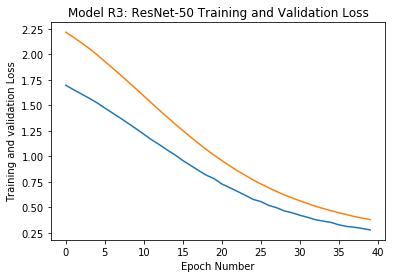

In [0]:
#Define the pretrained ResNet50 model
modelR3 = models.resnet50(pretrained=True)

for param in modelR3.parameters():
    param.requires_grad=False

#Define the classifier
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2048,102)
        #The output must be 10 to match the 10 monkey species classes
        self.fc2 = nn.Linear(102,10)
        
    def forward(self, x):
        x = x.view(x.shape[0],-1)
        x = F.relu(self.fc1(x))
        x = F.log_softmax(self.fc2(x), dim = 1)
        return x

#Instantiate the classifier and add it to the model
classifierR3 = Classifier()
modelR3.fc=classifierR3

print("The models new classifier has been added")

#Define the criterion and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.NLLLoss()
optimizer = optim.SGD(modelR3.fc.parameters(), lr = 0.01)

#Move the model to the GPU. 
modelR3.to(device)

# Train the model with the pretrained weights
epochs = 40

trainLossListR3 = []
validLossListR3 = []

for epoch in range(epochs):
    
    train_loss = 0.0
    valid_loss = 0.0
    
    modelR3.train()
    for inputs, labels in train_dataloader:
        inputs, labels = inputs.to(device),labels.to(device)
        optimizer.zero_grad()
        logps = modelR3.forward(inputs)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()
        train_loss +=loss.item()*inputs.size(0)
    train_loss = train_loss/len(train_dataloader.dataset)
    
    modelR3.eval()
    for inputs, labels in valid_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        output = modelR3(inputs)
        loss = criterion(output, labels)
        valid_loss += loss.item()*inputs.size(0)
    valid_loss = valid_loss/len(valid_dataloader.dataset)
    
    trainLossListR3.append(train_loss)
    validLossListR3.append(valid_loss)
    
    
    
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(epoch,train_loss, valid_loss))
    
    
#Plot the train and validation losses
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(trainLossListR3)), trainLossListR3)
plt.plot(np.arange(len(validLossListR3)), validLossListR3)
plt.ylabel('Training and validation Loss')
plt.xlabel('Epoch Number')
plt.title('Model R3: ResNet-50 Training and Validation Loss')
plt.show()

In [0]:
#Test Model R3 on the test dataset

test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))


classes = ['monkey1', 'monkey2', 'monkey3', 'monkey4', 'monkey5', 'monkey6', 'monkey7',
          'monkey8', 'monkey9', 'monkey10']
modelR3.eval()
for tdata, ttarget in test_dataloader:
    tdata,ttarget = tdata.cuda(), ttarget.cuda()
    
    output = modelR3(tdata)
    loss = criterion(output, ttarget)
    test_loss += loss.item()*tdata.size(0)
    _, pred = torch.max(output,1)
    
    correct_tensor = pred.eq(ttarget.data.view_as(pred))  
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    
    for i in range(1,batch_size):
        label = ttarget.data[i-1]
        class_correct[label] += correct[i].item()
        class_total[label] += 1


test_loss = test_loss/len(test_dataloader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(0,9):
    if class_total[i]>0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d) ' %( classes[i], 100*class_correct[i]/class_total[i], np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (100. * np.sum(class_correct)/ np.sum(class_total), np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.096427

Test Accuracy of monkey1: 100% (26/26) 
Test Accuracy of monkey2: 95% (22/23) 
Test Accuracy of monkey3: 100% (32/32) 
Test Accuracy of monkey4: 96% (24/25) 
Test Accuracy of monkey5: 100% (29/29) 
Test Accuracy of monkey6: 100% (29/29) 
Test Accuracy of monkey7: 96% (28/29) 
Test Accuracy of monkey8: 95% (23/24) 
Test Accuracy of monkey9: 96% (25/26) 

Test Accuracy (Overall): 98% (267/272)


## Model R4: ResNet-101

The models new classifier has been added
Epoch: 0 	Training Loss: 1.714690 	Validation Loss: 2.233986
Epoch: 1 	Training Loss: 1.663427 	Validation Loss: 2.176848
Epoch: 2 	Training Loss: 1.617935 	Validation Loss: 2.120258
Epoch: 3 	Training Loss: 1.572874 	Validation Loss: 2.059474
Epoch: 4 	Training Loss: 1.527419 	Validation Loss: 1.995048
Epoch: 5 	Training Loss: 1.472710 	Validation Loss: 1.927287
Epoch: 6 	Training Loss: 1.419947 	Validation Loss: 1.857611
Epoch: 7 	Training Loss: 1.366890 	Validation Loss: 1.786230
Epoch: 8 	Training Loss: 1.308764 	Validation Loss: 1.713392
Epoch: 9 	Training Loss: 1.254288 	Validation Loss: 1.641241
Epoch: 10 	Training Loss: 1.196548 	Validation Loss: 1.567711
Epoch: 11 	Training Loss: 1.143289 	Validation Loss: 1.494974
Epoch: 12 	Training Loss: 1.088532 	Validation Loss: 1.424143
Epoch: 13 	Training Loss: 1.027958 	Validation Loss: 1.351971
Epoch: 14 	Training Loss: 0.973440 	Validation Loss: 1.282417
Epoch: 15 	Training Loss: 0.927124 	Val

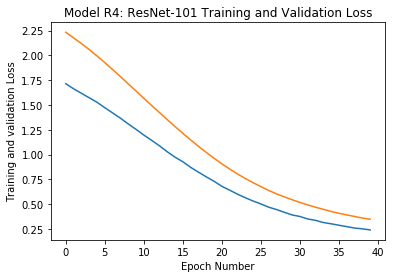

In [0]:
#Define the pretrained ResNet101 model
modelR4 = models.resnet101(pretrained=True)

for param in modelR4.parameters():
    param.requires_grad=False

#Define the classifier
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2048,102)
        #The output must be 10 to match the 10 monkey species classes
        self.fc2 = nn.Linear(102,10)
        
    def forward(self, x):
        x = x.view(x.shape[0],-1)
        x = F.relu(self.fc1(x))
        x = F.log_softmax(self.fc2(x), dim = 1)
        return x

#Instantiate the classifier and add it to the model
classifierR4 = Classifier()
modelR4.fc=classifierR4

print("The models new classifier has been added")

#Define the criterion and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.NLLLoss()
optimizer = optim.SGD(modelR4.fc.parameters(), lr = 0.01)

#Move the model to the GPU. 
modelR4.to(device)

# Train the model with the pretrained weights
epochs = 40

trainLossListR4 = []
validLossListR4 = []

for epoch in range(epochs):
    
    train_loss = 0.0
    valid_loss = 0.0
    
    modelR4.train()
    for inputs, labels in train_dataloader:
        inputs, labels = inputs.to(device),labels.to(device)
        optimizer.zero_grad()
        logps = modelR4.forward(inputs)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()
        train_loss +=loss.item()*inputs.size(0)
    train_loss = train_loss/len(train_dataloader.dataset)
    
    modelR4.eval()
    for inputs, labels in valid_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        output = modelR4(inputs)
        loss = criterion(output, labels)
        valid_loss += loss.item()*inputs.size(0)
    valid_loss = valid_loss/len(valid_dataloader.dataset)
    
    trainLossListR4.append(train_loss)
    validLossListR4.append(valid_loss)
    
    
    
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(epoch,train_loss, valid_loss))
    
    
#Plot the train and validation losses
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(trainLossListR4)), trainLossListR4)
plt.plot(np.arange(len(validLossListR4)), validLossListR4)
plt.ylabel('Training and validation Loss')
plt.xlabel('Epoch Number')
plt.title('Model R4: ResNet-101 Training and Validation Loss')
plt.show()

In [0]:
#Test Model R4 on the test dataset

test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))


classes = ['monkey1', 'monkey2', 'monkey3', 'monkey4', 'monkey5', 'monkey6', 'monkey7',
          'monkey8', 'monkey9', 'monkey10']
modelR4.eval()
for tdata, ttarget in test_dataloader:
    tdata,ttarget = tdata.cuda(), ttarget.cuda()
    
    output = modelR4(tdata)
    loss = criterion(output, ttarget)
    test_loss += loss.item()*tdata.size(0)
    _, pred = torch.max(output,1)
    
    correct_tensor = pred.eq(ttarget.data.view_as(pred))  
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    
    for i in range(1,batch_size):
        label = ttarget.data[i-1]
        class_correct[label] += correct[i].item()
        class_total[label] += 1


test_loss = test_loss/len(test_dataloader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(0,10):
    if class_total[i]>0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d) ' %( classes[i], 100*class_correct[i]/class_total[i], np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (100. * np.sum(class_correct)/ np.sum(class_total), np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.080856

Test Accuracy of monkey1: 96% (24/25) 
Test Accuracy of monkey2: 100% (23/23) 
Test Accuracy of monkey3: 96% (31/32) 
Test Accuracy of monkey4: 100% (25/25) 
Test Accuracy of monkey5: 100% (30/30) 
Test Accuracy of monkey6: 93% (27/29) 
Test Accuracy of monkey7: 96% (29/30) 
Test Accuracy of monkey8: 100% (23/23) 
Test Accuracy of monkey9: 100% (26/26) 
Test Accuracy of monkey10: 100% (29/29) 

Test Accuracy (Overall): 98% (267/272)


## Model R5: ResNet-152


The models new classifier has been added
Epoch: 0 	Training Loss: 1.704292 	Validation Loss: 2.240986
Epoch: 1 	Training Loss: 1.655109 	Validation Loss: 2.177282
Epoch: 2 	Training Loss: 1.606847 	Validation Loss: 2.114345
Epoch: 3 	Training Loss: 1.557245 	Validation Loss: 2.051345
Epoch: 4 	Training Loss: 1.509263 	Validation Loss: 1.986096
Epoch: 5 	Training Loss: 1.455578 	Validation Loss: 1.918620
Epoch: 6 	Training Loss: 1.403724 	Validation Loss: 1.849635
Epoch: 7 	Training Loss: 1.348497 	Validation Loss: 1.779195
Epoch: 8 	Training Loss: 1.298033 	Validation Loss: 1.707834
Epoch: 9 	Training Loss: 1.241420 	Validation Loss: 1.635807
Epoch: 10 	Training Loss: 1.184357 	Validation Loss: 1.561764
Epoch: 11 	Training Loss: 1.128004 	Validation Loss: 1.490293
Epoch: 12 	Training Loss: 1.072513 	Validation Loss: 1.415595
Epoch: 13 	Training Loss: 1.015317 	Validation Loss: 1.343643
Epoch: 14 	Training Loss: 0.959825 	Validation Loss: 1.270985
Epoch: 15 	Training Loss: 0.902097 	Val

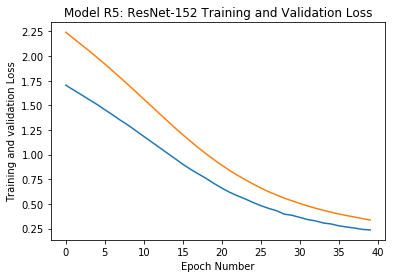

In [0]:
#Define the pretrained ResNet101 model
modelR5 = models.resnet152(pretrained=True)

for param in modelR5.parameters():
    param.requires_grad=False

#Define the classifier
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2048,102)
        #The output must be 10 to match the 10 monkey species classes
        self.fc2 = nn.Linear(102,10)
        
    def forward(self, x):
        x = x.view(x.shape[0],-1)
        x = F.relu(self.fc1(x))
        x = F.log_softmax(self.fc2(x), dim = 1)
        return x

#Instantiate the classifier and add it to the model
classifierR5 = Classifier()
modelR5.fc=classifierR5

print("The models new classifier has been added")

#Define the criterion and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.NLLLoss()
optimizer = optim.SGD(modelR5.fc.parameters(), lr = 0.01)

#Move the model to the GPU. 
modelR5.to(device)

# Train the model with the pretrained weights
epochs = 40

trainLossListR5 = []
validLossListR5 = []

for epoch in range(epochs):
    
    train_loss = 0.0
    valid_loss = 0.0
    
    modelR5.train()
    for inputs, labels in train_dataloader:
        inputs, labels = inputs.to(device),labels.to(device)
        optimizer.zero_grad()
        logps = modelR5.forward(inputs)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()
        train_loss +=loss.item()*inputs.size(0)
    train_loss = train_loss/len(train_dataloader.dataset)
    
    modelR5.eval()
    for inputs, labels in valid_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        output = modelR5(inputs)
        loss = criterion(output, labels)
        valid_loss += loss.item()*inputs.size(0)
    valid_loss = valid_loss/len(valid_dataloader.dataset)
    
    trainLossListR5.append(train_loss)
    validLossListR5.append(valid_loss)
    
    
    
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(epoch,train_loss, valid_loss))
    
    
#Plot the train and validation losses
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(trainLossListR5)), trainLossListR5)
plt.plot(np.arange(len(validLossListR5)), validLossListR5)
plt.ylabel('Training and validation Loss')
plt.xlabel('Epoch Number')
plt.title('Model R5: ResNet-152 Training and Validation Loss')
plt.show()

In [0]:
#Test Model R5 on the test dataset

test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))


classes = ['monkey1', 'monkey2', 'monkey3', 'monkey4', 'monkey5', 'monkey6', 'monkey7',
          'monkey8', 'monkey9', 'monkey10']
modelR5.eval()
for tdata, ttarget in test_dataloader:
    tdata,ttarget = tdata.cuda(), ttarget.cuda()
    
    output = modelR5(tdata)
    loss = criterion(output, ttarget)
    test_loss += loss.item()*tdata.size(0)
    _, pred = torch.max(output,1)
    
    correct_tensor = pred.eq(ttarget.data.view_as(pred))  
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    
    for i in range(1,batch_size):
        label = ttarget.data[i-1]
        class_correct[label] += correct[i].item()
        class_total[label] += 1


test_loss = test_loss/len(test_dataloader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(0,10):
    if class_total[i]>0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d) ' %( classes[i], 100*class_correct[i]/class_total[i], np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (100. * np.sum(class_correct)/ np.sum(class_total), np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.081175

Test Accuracy of monkey1: 100% (25/25) 
Test Accuracy of monkey2: 100% (23/23) 
Test Accuracy of monkey3: 100% (31/31) 
Test Accuracy of monkey4: 100% (25/25) 
Test Accuracy of monkey5: 96% (29/30) 
Test Accuracy of monkey6: 100% (29/29) 
Test Accuracy of monkey7: 100% (30/30) 
Test Accuracy of monkey8: 100% (24/24) 
Test Accuracy of monkey9: 100% (26/26) 
Test Accuracy of monkey10: 100% (29/29) 

Test Accuracy (Overall): 99% (271/272)


## Comparing Models R1-R5

* Models R1-R5 accuracies are recreated in the below table

| Model | Overall Test Accuracy | 
| ----| ----|
|Model R1: ResNet-18 |   |
|Model R2: ResNet-34 |   |
|Model R3: ResNet-50 |   |
|Model R4: ResNet-101 |   |
|Model R5: ResNet-152|   |


Text(0, 0.5, 'Training Loss')

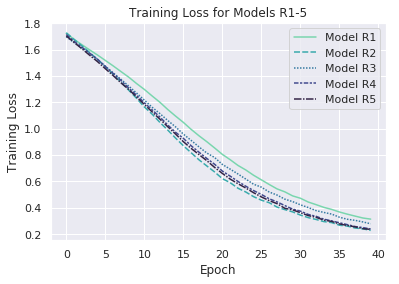

In [0]:
# To better compare how the architecture of the different networks affects its learning potential for a fine-grain classification task,
#       Figure 1: Plot of Training Loss
#       Figure 2: Plot of Validation Loss


sns.set(style="darkgrid")

trainingLoss_df = pd.DataFrame(list(zip(trainLossListR1, trainLossListR2, trainLossListR3, trainLossListR4, trainLossListR5)),
                              columns = ['Model R1','Model R2','Model R3','Model R4', 'Model R5'])
palette = sns.color_palette("mako_r", 5)
ax = sns.lineplot(data=trainingLoss_df, palette=palette).set_title('Training Loss for Models R1-5')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')

Text(0, 0.5, 'Validation Loss')

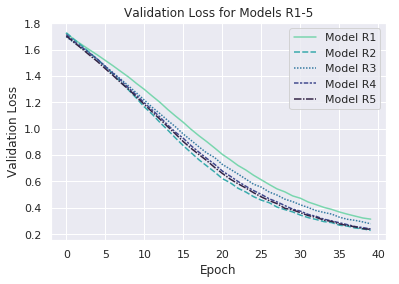

In [0]:
validLoss_df = pd.DataFrame(list(zip(validLossListR1, validLossListR2, validLossListR3, validLossListR4, validLossListR5)),
                              columns = ['Model R1','Model R2','Model R3','Model R4', 'Model R5'])
palette = sns.color_palette("mako_r", 5)
ax = sns.lineplot(data=trainingLoss_df, palette=palette).set_title('Validation Loss for Models R1-5')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')